#### Initial preparations: importing libraries and files locations

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Define path
path = r'/Users/d_matos/Desktop/Career Foundry/4. Python Fundamentals for Data Analysts/Instacart Basket Analysis'

#### Dataframe: merged_final

In [10]:
df410 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_final.pkl'))

In [12]:
col_list = df410.columns.tolist()

In [14]:
col_list

['user_id',
 'first_name',
 'surname',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'order_id',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spending_flag',
 'median_frequency',
 'frequency_flag']

In [16]:
df410.shape

(32404859, 31)

# Visualisations

### Sales

In [18]:
df410['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [22]:
df410['order_hour_of_day'].describe()

count   32404859.00
mean          13.43
std            4.25
min            0.00
25%           10.00
50%           13.00
75%           16.00
max           23.00
Name: order_hour_of_day, dtype: float64

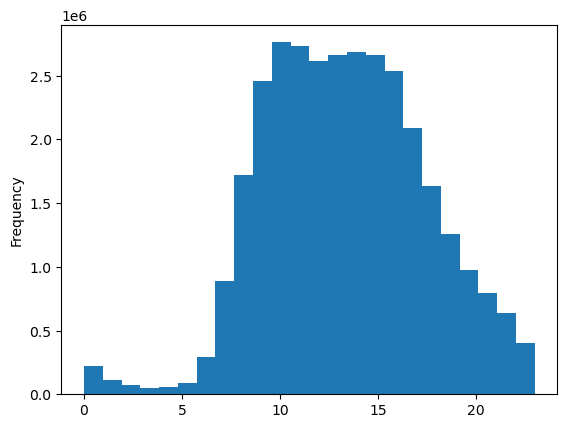

In [24]:
#Create a histogram of the “order_hour_of_day” column.
hist = df410['order_hour_of_day'].plot.hist(bins = 24)

In [115]:
#Based on the histogram we can see that a greater number of orders are placed around 10 am. 
#The frequency remains high until 15:00, and it keeps decreasing after that.
#The are significantly less orders from midnight to 7am.

In [26]:
#Export figure
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hour_orders_histog.png'))

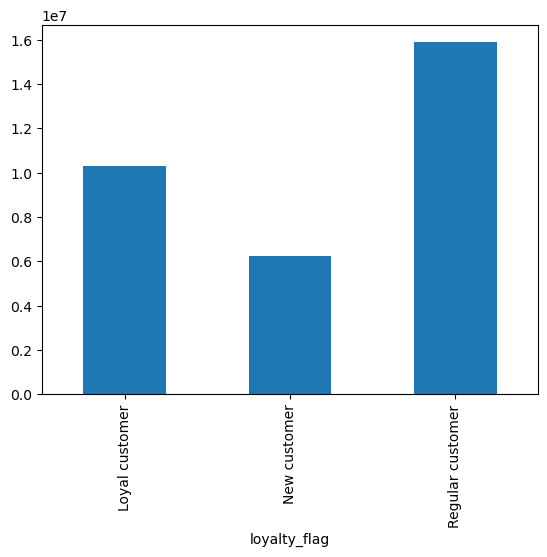

In [28]:
#Loyalty customer sales
bar = df410['loyalty_flag'].value_counts().sort_index().plot.bar()

In [30]:
#Export figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_flag_bar.png'))

In [34]:
#Sample selection
np.random.seed(4)
dev = np.random.rand(len(df410)) <= 0.7

In [36]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [38]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [42]:
big = df410[dev]
small = df410[~dev]

In [44]:
len(df410)

32404859

In [46]:
len(big) + len(small)

32404859

In [48]:
df410b = small[['order_hour_of_day','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


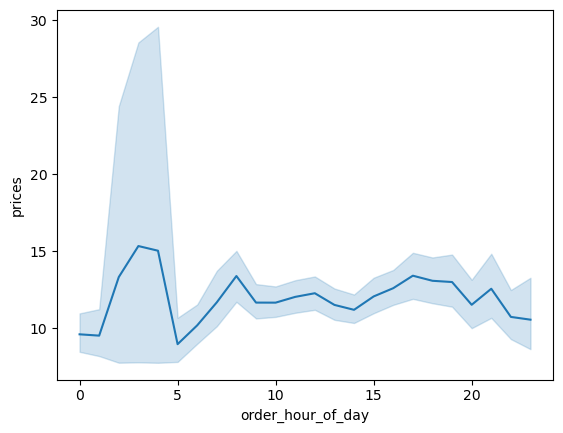

In [50]:
line = sns.lineplot(data = df410b, x = 'order_hour_of_day',y = 'prices')

In [52]:
# The line is essentially flat, suggesting that there is no significant difference in expenditure throughout the day, but the orders in the early hours of the morning tend to be on the higher end, that is, less volume in orders, but more expensive products are bought.

In [54]:
#Export figure
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'expenditure_hours.png'))

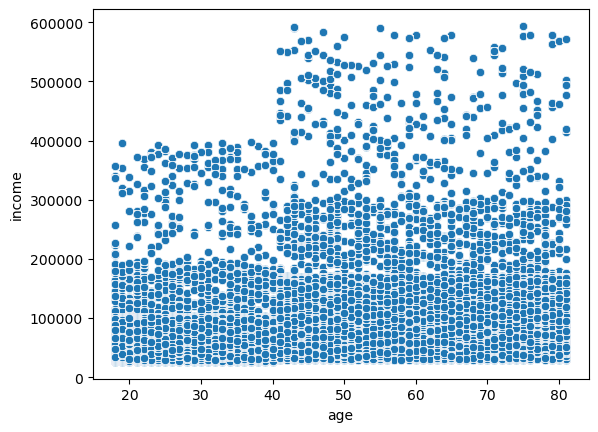

In [56]:
#Age-Income relationship
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df410)

In [60]:
# Since the scatterplot is so confusing, i decided to create ten-year age groups and see the average income.
df410['age_group'] = pd.cut(df410['age'], bins=range(0, 101, 10))

In [62]:
df410['age_group_str'] = df410['age_group'].astype(str)

In [64]:
age_income_grouped = df410.groupby('age_group_str')['income'].mean().reset_index()

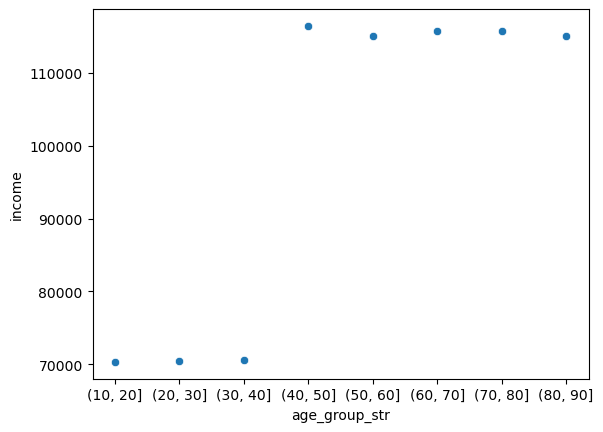

In [66]:
scatterplot2 = sns.scatterplot(x='age_group_str', y='income', data=age_income_grouped)

In [68]:
#Now it is more clear that older age groups have higher incomes

In [70]:
scatterplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_age group.png'))